In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score

# Read in the dataset from .csv file
dataset = pd.read_csv('GlaucomaMLDataset20Subjects.csv')

# Choose the inpedendent variables with X and dependent variable with y
X = dataset.iloc[:, [1, 2, 3, 5]].values
y = dataset.iloc[:, 6].values

# Split the data into 75% training data and 25% testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

# Feature scaling to normalize the data
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Build Kernel SVM Model (rbf = non-linear classification)
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, y_train)

# Predict the test set results
y_pred = classifier.predict(X_test)

# Get accuracy from predictions with confusion matrix
numGlaucoma = dataset.iloc[:, 6].value_counts()[1]
numHealthy = dataset.iloc[:, 6].value_counts()[0]
# print('Results from ' + str(dataset.shape[0]) + ' samples: ' + str(numGlaucoma) + ' glaucoma, ' + str(numHealthy) + ' healthy')
print('Support Vector Machine Results:')
print('\nConfusion Matrix:')
cm = confusion_matrix(y_test, y_pred)
print(cm)
print()
print('Classification Accuracy:')
print(round(accuracy_score(y_test, y_pred), 3))

Support Vector Machine Results:

Confusion Matrix:
[[4 0]
 [0 2]]

Classification Accuracy:
1.0


/var/folders/vc/mm20ljdj4hx70_c_bgr3q0540000gn/T/ipykernel_30879/1594924588.py:11: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


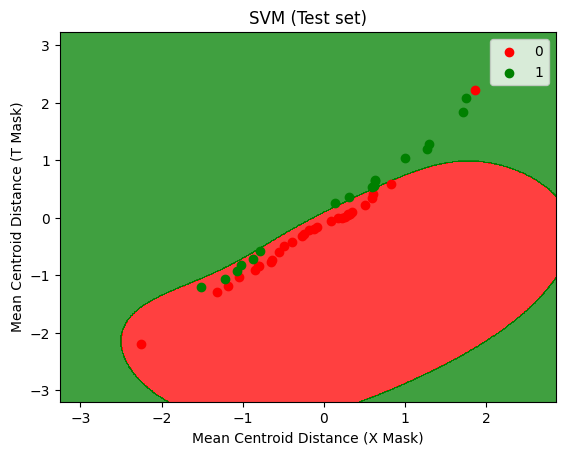

In [5]:
from matplotlib.colors import ListedColormap

X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('SVM (Test set)')
plt.xlabel('Mean Centroid Distance (X Mask)')
plt.ylabel('Mean Centroid Distance (T Mask)')
plt.legend()
plt.show()